# <span style="color:violet">Airline Ticket Price Prediction with ML Regression Model</span>

## Libraries imports

#### Library imports for i/o

In [1]:
# working with structured data
import pandas as pd

# support for arrays, matrices, and mathematical functions to operate on data structures
import numpy as np

# manipulating file paths and directories
import os.path

#### Pandas library configurations

In [14]:
# allow re-write on variable
pd.options.mode.copy_on_write = True 

# setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None) 
# setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None) 

#### Libraries for general purposes

In [2]:
# embedding HTML content like visualizations or interactive elements within a Jupyter notebook
from IPython.display import HTML

# generating random strings or for various string manipulation tasks
from string import ascii_letters

# generating random numbers within a specified range
from random import randint

import time

#### Filtering warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Matplotlib and Seaborn

##### Seaborn:
1. Seaborn is built on top of Matplotlib and provides a higher-level interface for creating attractive statistical graphics.
2. It simplifies the process of creating complex plots such as histograms, KDE plots, and regression plots by providing easy-to-use functions with sensible defaults.
3. Seaborn is particularly useful for exploring and visualizing relationships in complex datasets.
4. It is well-suited for statistical data analysis and exploratory data visualization.

##### Matplotlib:
1. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
2. It provides a MATLAB-like interface for creating plots and offers fine-grained control over plot customization.
3. Matplotlib is highly customizable and can create nearly any type of plot imaginable, although sometimes with more verbose syntax compared to other libraries.
4. It is a foundational library for data visualization in Python and is often used for creating publication-quality graphics and embedding plots in various applications.

In [13]:
# statistical data visualization
import seaborn as sns
# seaborn style
# sns.set_style('darkgrid') 

# for Q-Q plots
import scipy.stats as stats

# creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

##### Plotly Packages

1. Plotly is another library for creating interactive visualizations, with a focus on producing publication-quality graphics.
2. It supports a wide range of chart types and offers numerous customization options for fine-tuning plots.
3. Plotly also provides an online platform (Chart Studio) for sharing, collaborating on, and hosting Plotly graphs.
4. It is well-suited for creating interactive visualizations that can be easily shared and embedded in web applications, reports, and presentations.

In [5]:
# Python graphing library that makes interactive, publication-quality graphs online
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
# work in offline mode with Jupyter notebooks
init_notebook_mode(connected=True)

#### Plot Library for flexible data visualization purposes

1. It provides a concise and powerful interface for creating a wide variety of plots, including interactive plots suitable for web applications and dashboards.
2. Bokeh emphasizes interactivity and can handle large datasets with ease.
3. It is well-suited for creating complex, interactive visualizations for web-based applications and dashboards.

In [6]:
# creating interactive and web-ready visualizations
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.layouts import gridplot

Loading BokehJS ...

#### Statistical Libraries

In [7]:
from scipy import stats

#### Data-preprocessing libraries

In [8]:
# encoding categorical features
from sklearn.preprocessing import LabelEncoder

# generate polynomial and interaction features
from sklearn.preprocessing import PolynomialFeatures

# scale numerical features to a specified range
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Model tuning libraries

In [9]:
# chaining together multiple processing steps into a single object
from sklearn.pipeline import Pipeline

# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# cross-validation technics
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit

#### Regression models libraries

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

import xgboost as xgb

#### Model hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV

## Read the Dataset for health insurance

In [15]:
# path to the original dataset
df_path ="D://programming//information-technologies-of-smart-systems//term-paper//Clean_Dataset.csv"

In [16]:
# is there such path?
print(os.path.exists(df_path))

True


In [82]:
# read the airline dataset
df = pd.read_csv(df_path)

## Exploratory Data Analysis (EDA)

### Data Shapes

In [18]:
print('columns count - ', len(df.columns), '\n')
print('columns: ', list(df.columns))

columns count -  12 

columns:  ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [19]:
print('Samples count: ', df.shape[0])

Samples count:  300153


In [20]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [83]:
# dropping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

Rename class name to flight_class, because *class* is python reserved name.

In [84]:
df.rename(columns={'class': 'flight_class'}, inplace=True)

#### Data Types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   flight_class      300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


#### Descriptive Statistics

In [30]:
df.describe(include='O')    # for categorical variables

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [31]:
df.describe(exclude='O')    # for numerical variables

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Check for missing value

In [32]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
flight_class        0
duration            0
days_left           0
price               0
dtype: int64

##### There is no missing value in the data :)

Text(0.5, 1.0, 'Missing value in the dataset')

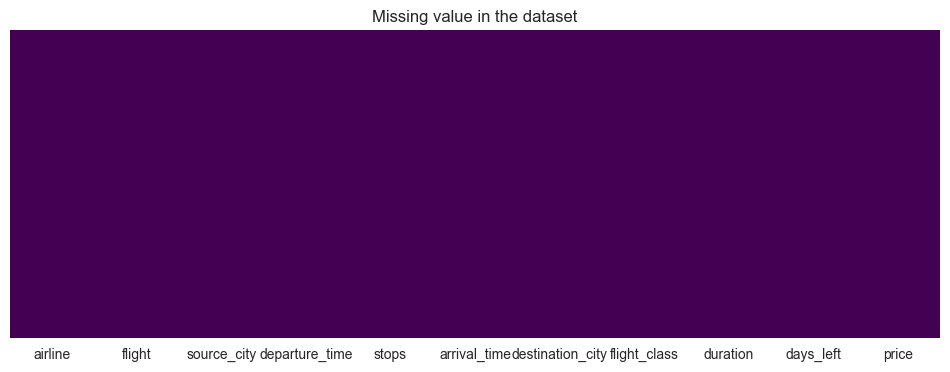

In [33]:
# no missing data visualisation
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

### Visualizations. Plots for data exploring

**Features**

The various features of the cleaned dataset are explained below:
1) Airline. The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight. Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City. City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time. This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops. A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time. This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City. City where the flight will land. It is a categorical feature having 6 unique cities.
8) Flight_class. A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration. A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left. This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price. Target variable stores information of the ticket price.

#### General mixed plots

There's something insanely beautiful about bmi distribution, isn't there?
The average BMI in patients is 30.

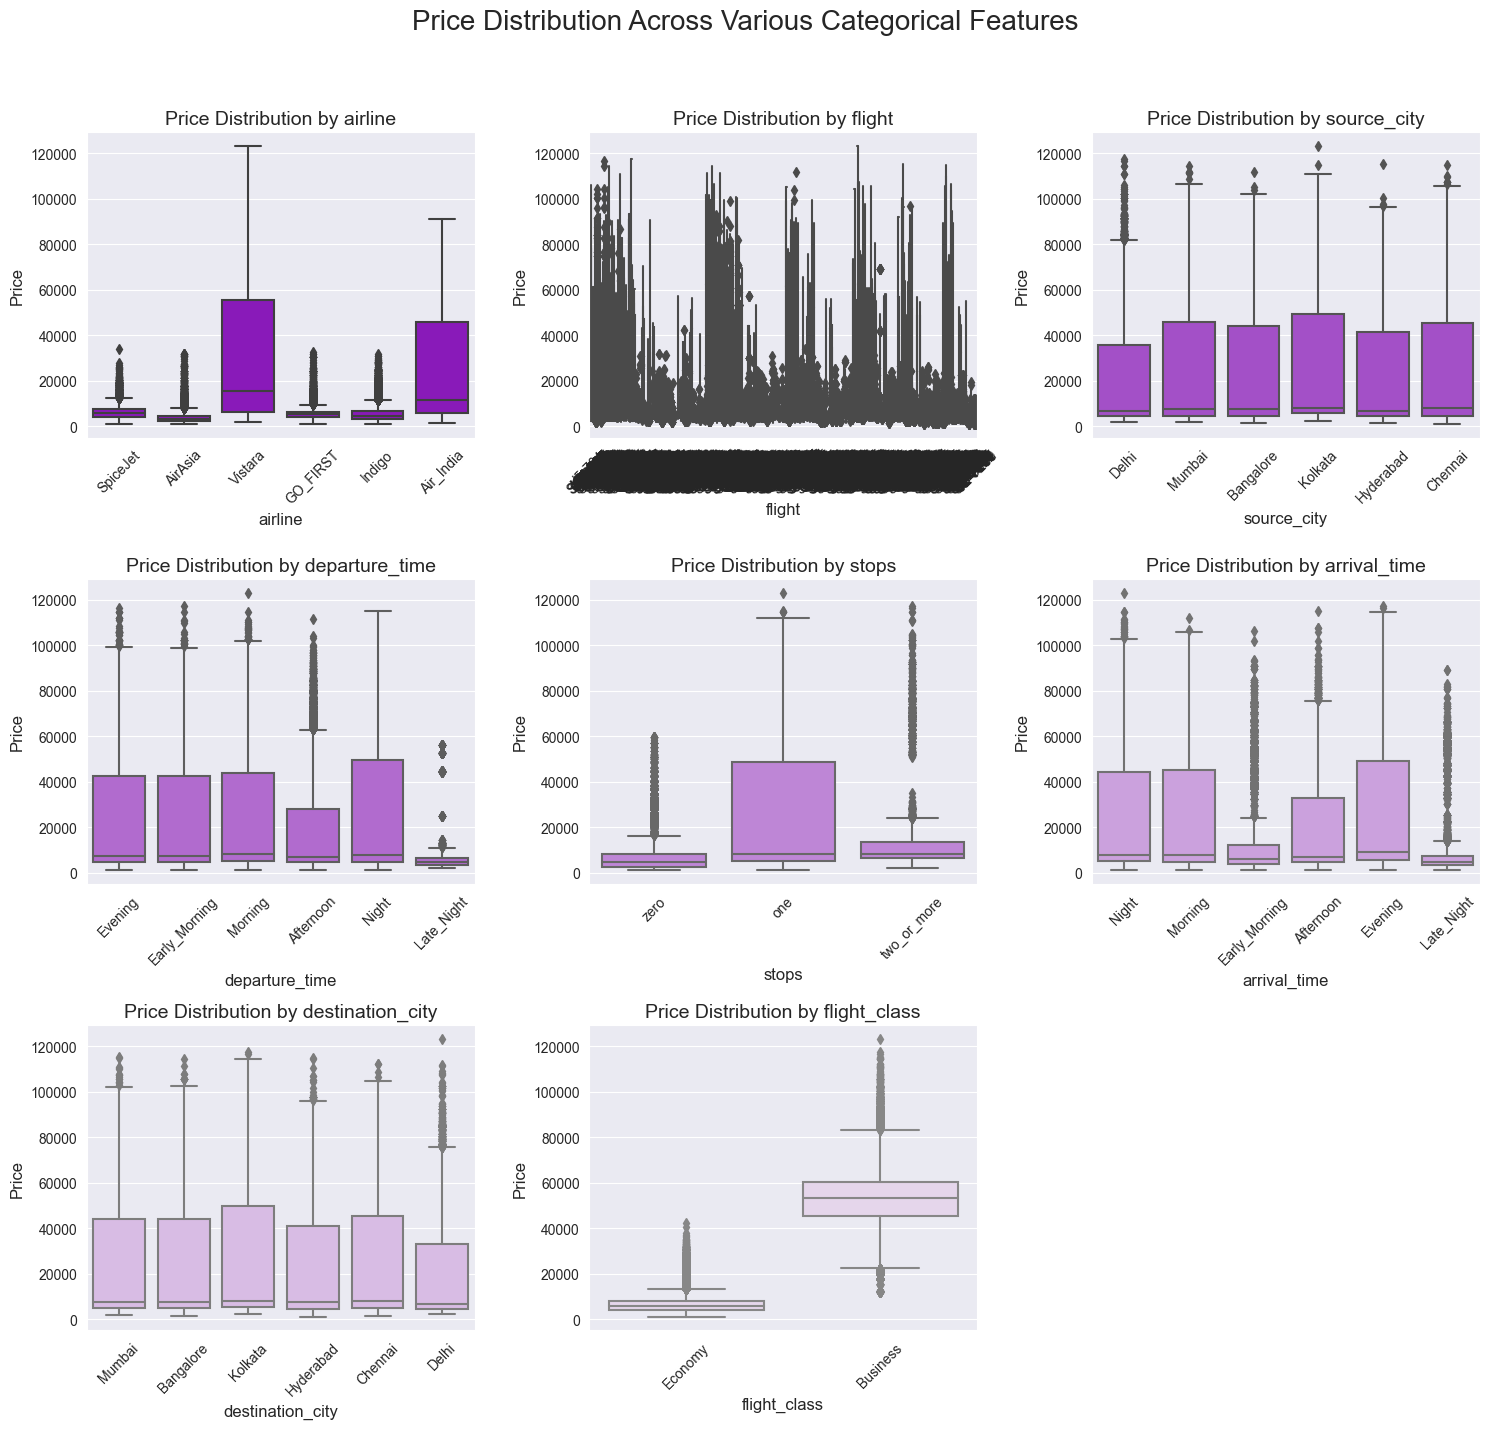

In [37]:
# selecting categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# extracting column names into a list
selected_cols = [col for col in categorical_cols]

# calculating the number of subplots needed
num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

# creating the subplot grid and setting figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')

# adding a title to the figure
fig.suptitle("Price Distribution Across Various Categorical Features", size=20)

# generating a palette of colors for visualization
colors = sns.light_palette('darkviolet', n_colors=len(selected_cols)+1, reverse=True)

# plotting boxplots for each selected categorical feature
for idx, col in enumerate(selected_cols):
    row = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[idx] if num_rows == 1 else axes[row, col_idx]
    sns.boxplot(x=col, y='price', data=df, ax=ax, palette=[colors[idx]])
    ax.set_title(f'Price Distribution by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Price", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# removing excess empty subplots if there are any
for ax in axes.flat[num_subplots:]:
    ax.remove()

# adjusting layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# displaying the plot
plt.show()

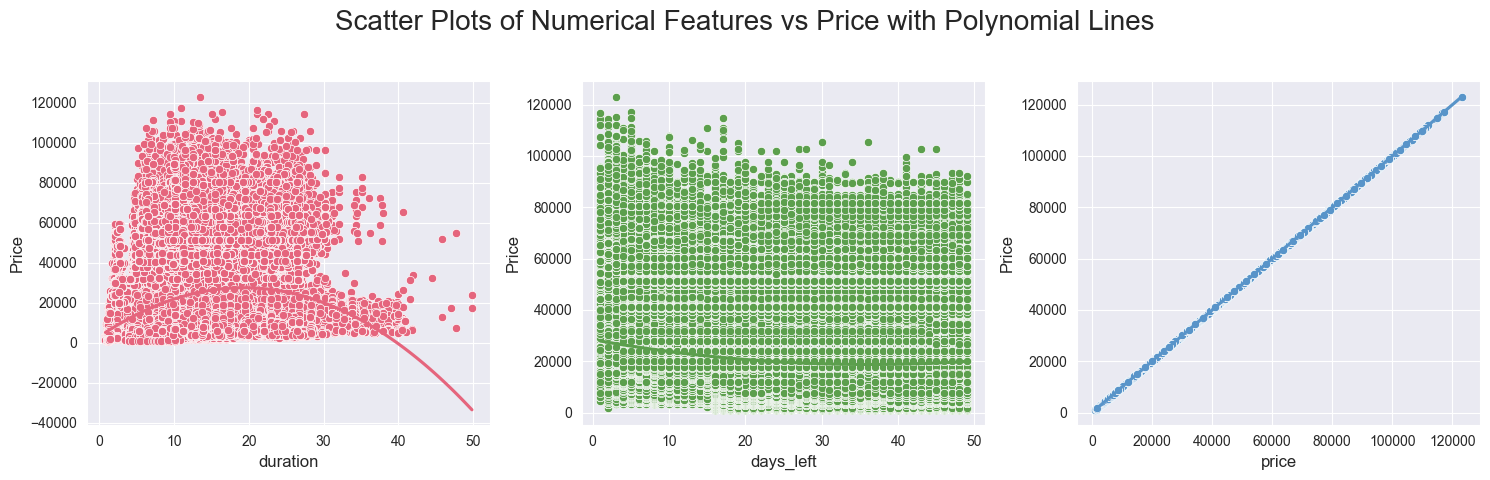

In [38]:
# selecting numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# excluding the 'charges' column from the selected numerical features
selected_cols = [col for col in numerical_cols if col != 'charges']

# calculating the number of subplots needed
num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

# creating the subplot grid and setting figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')

# adding a title to the figure
fig.suptitle("Scatter Plots of Numerical Features vs Price with Polynomial Lines", size=20)

# generating a palette of colors for visualization
palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

# plotting scatter plots with polynomial lines for each selected numerical feature
for idx, col in enumerate(selected_cols):
    if num_rows == 1 or num_cols == 1:
        ax = axes[idx]
    else:
        row = idx // num_cols
        col_idx = idx % num_cols
        ax = axes[row, col_idx]
        
    sns.scatterplot(x=col, y='price', data=df, ax=ax, color=palette[idx])
    sns.regplot(x=col, y='price', data=df, ax=ax, scatter=False, order=2, color=palette[idx], ci=None)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Price", fontsize=12)

# removing excess empty subplots if there are any
for ax in axes.flat[num_subplots:]:
    ax.remove()

# adjusting layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# displaying the plot
plt.show()

### Detailed plots 

In [41]:
# print all columns and their indexes
for index, value in enumerate(df.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


Total number of Flights from one city to another.

In [86]:
df.groupby(['flight','source_city','destination_city','airline','flight_class'], 
           as_index=False).count().groupby(['source_city','destination_city'],
           as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


Average Price of different Airlnes from Source city to Destination city.

In [87]:
df.groupby(['airline','source_city','destination_city'],
           as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


##### Exploring airline companies

In [42]:
# print unique values for airline
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

##### Statistics for popularity of each company airline
- Most used airline is Vistara (43% of all flights, 127859 flights).
- Second place is Air_India (27% of all flights, 80892 flights).
- Less used airline is SpiceJet (3% of all flights, 9011 flights).

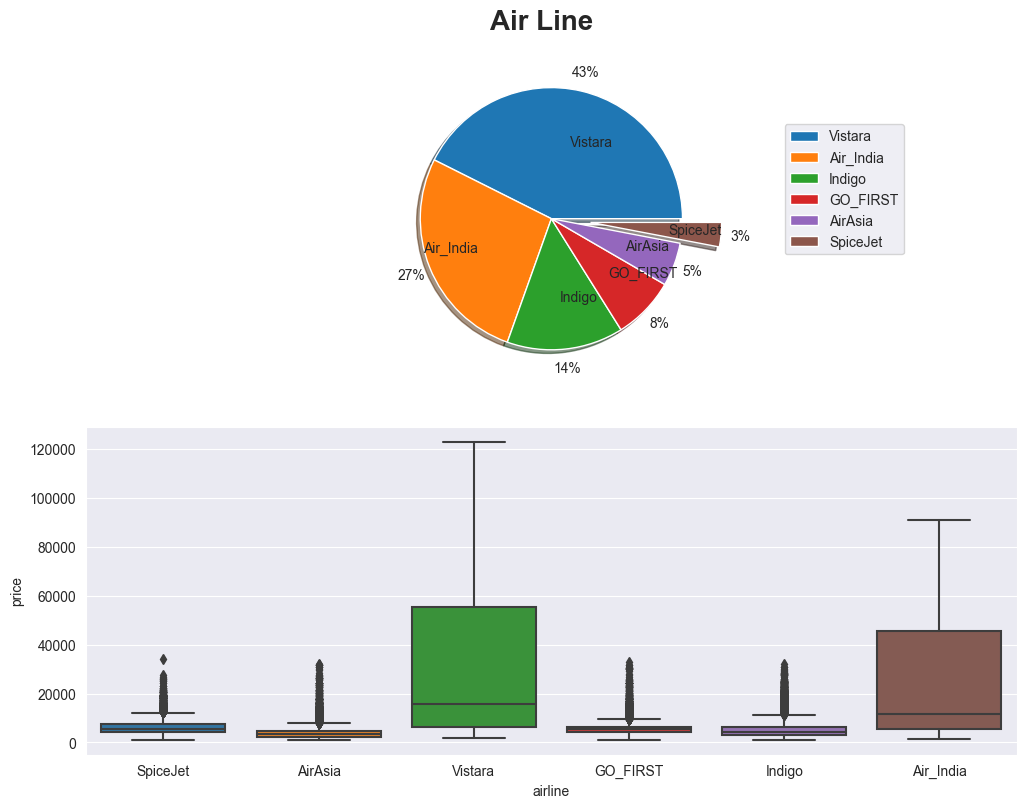

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Airline', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='airline', y='price', data=df, ax=ax[1])

plt.show()

##### Exploring flight (like ID feature)

In [46]:
len(df.flight.value_counts())

1561

Because of large values of unique values, I can not plot this column.
Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.

In [47]:
df.drop(columns='flight', inplace=True)

##### Exploring source cities of flights

In [48]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

**Source City Vs Ticket Price**
1. Almost number of all flights source is equal.
2. Ticket Price is More for the Flights whose Source City is Kolkata.
3. Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore.
4. Ticket Price is Low for the Flights Having Source City as Delhi.

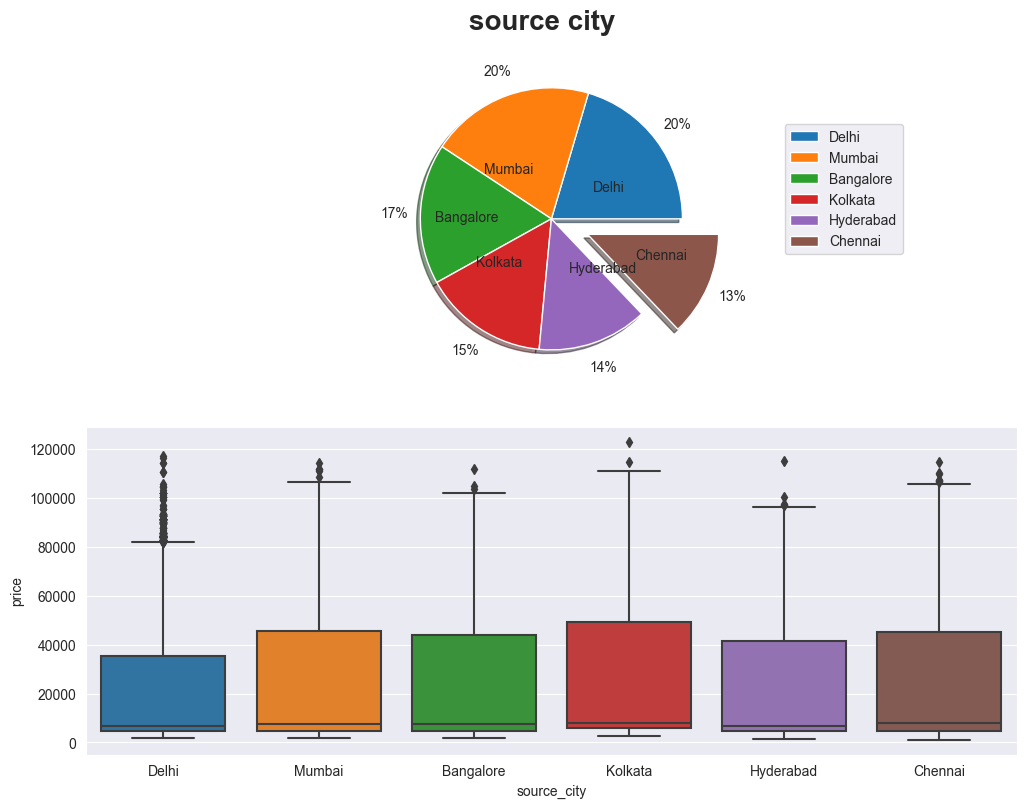

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='source_city', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring departure time

In [51]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

**Departure Time Vs Ticket Price**

1. Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal.
2. Ticket Price is More for the Flights when the Departure Time is at Night.
3. Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening.
4. Ticket Price is Low for the Flights Having Departure Time at Late_night.

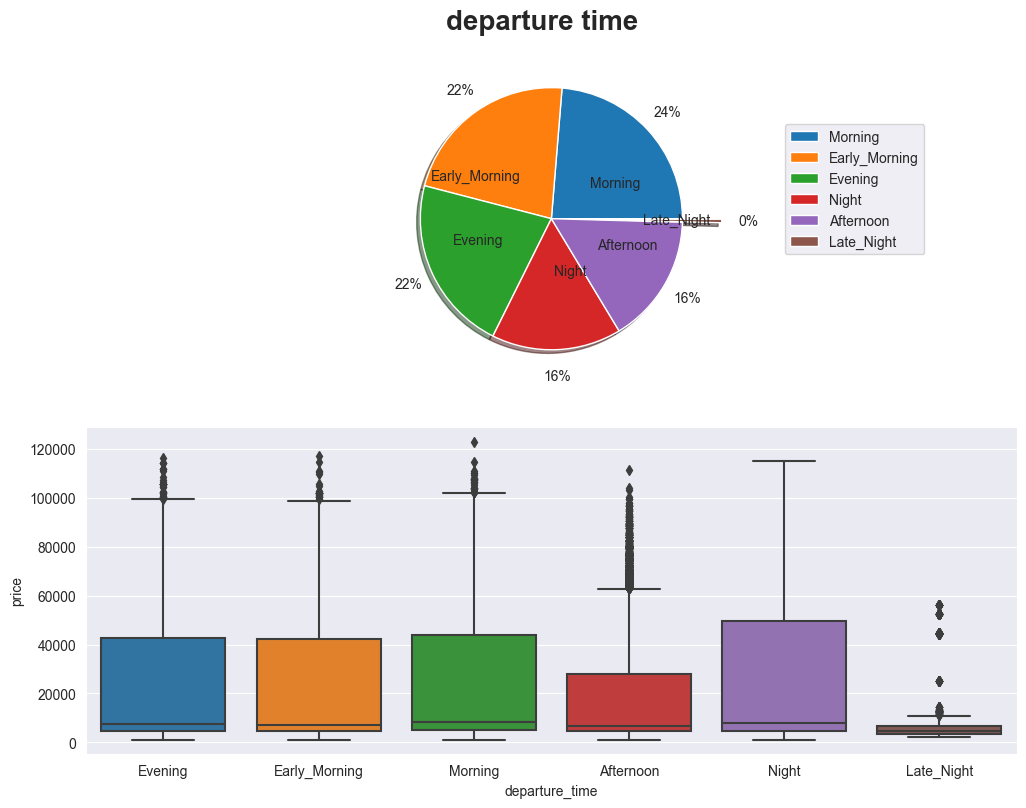

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='departure_time', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight stops

In [53]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

- Most of the flights have 1 stop (about 84% , 250863 flights).
- Just 4% of flights have 2 or more than 2 stops during their flights.
- About 12% of flights have not any stop.(13286 flights).

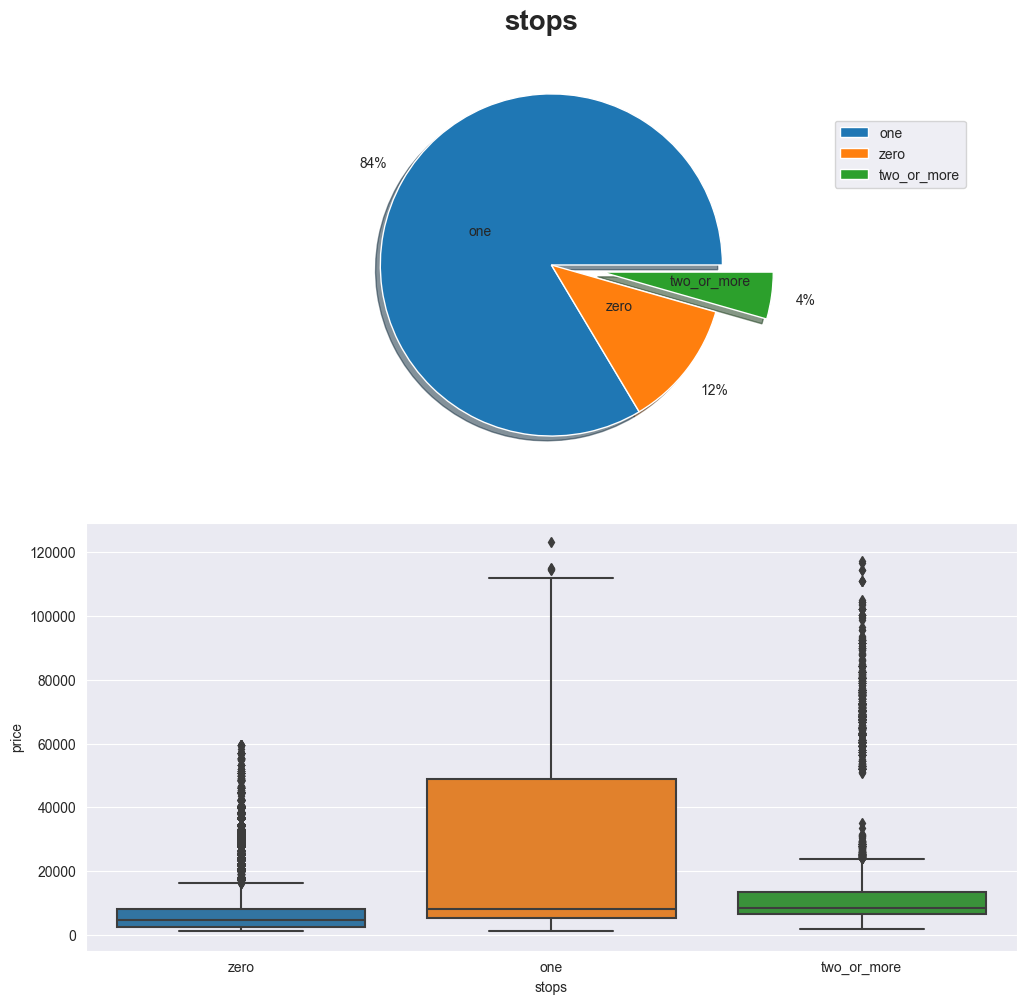

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(df.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='stops', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight arrival time

In [56]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

**The three most popular arrival times, based on the provided data, are:**
1. Night: 91,538 arrivals.
2. Evening: 78,323 arrivals.
3. Morning: 62,735 arrivals.

**Arrival Time Vs Ticket Price**
1. Ticket Price is More for the Flights when the Arrival Time is at Evening.
2. Ticket Price is almost equal for flights Having Arrival time is at Morning and Night.
3. Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time.

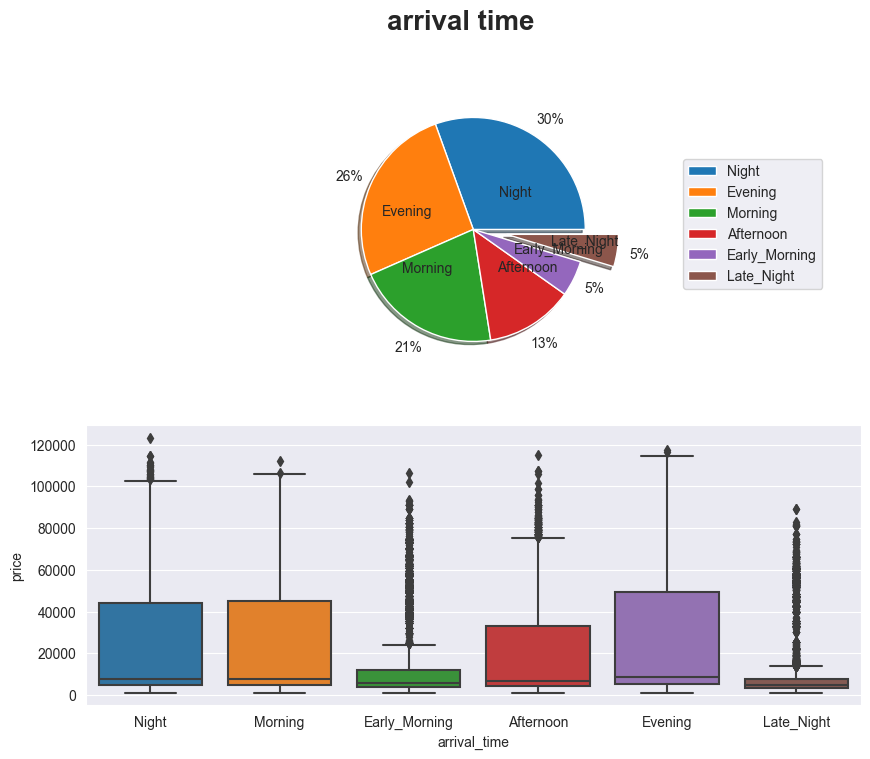

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# top ax
labels = df.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='arrival_time', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring destination city of flight

In [58]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

**Destination City Vs Ticket Price**
1. Except at the city Kolkata, the frequency of the rest of the destination_city is almost equal.
2. Ticket Price is More for the Flights whose Destination City is kolkata and Chennai.
3. Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore.
4. Ticket Price is Low for the Flights Having Destination City as Delhi.

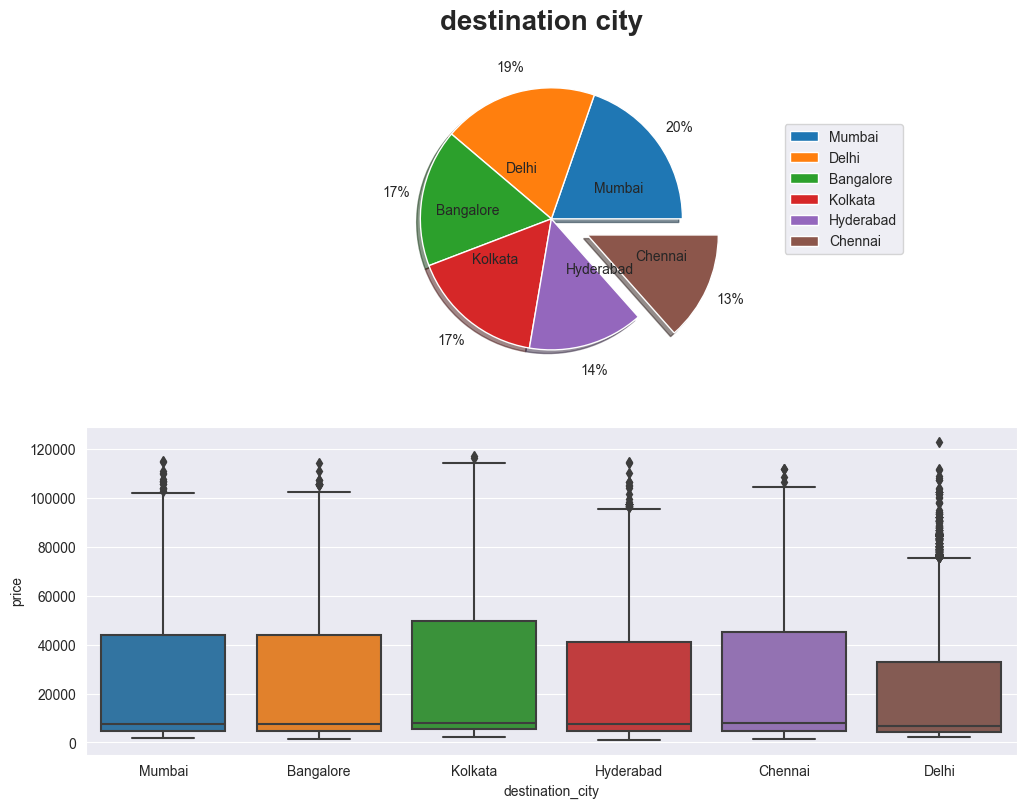

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='destination_city', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight class

In [60]:
df.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

* Obviously Business classes are more expensive than Economic.
* Most of flights are Economy (about 69%).

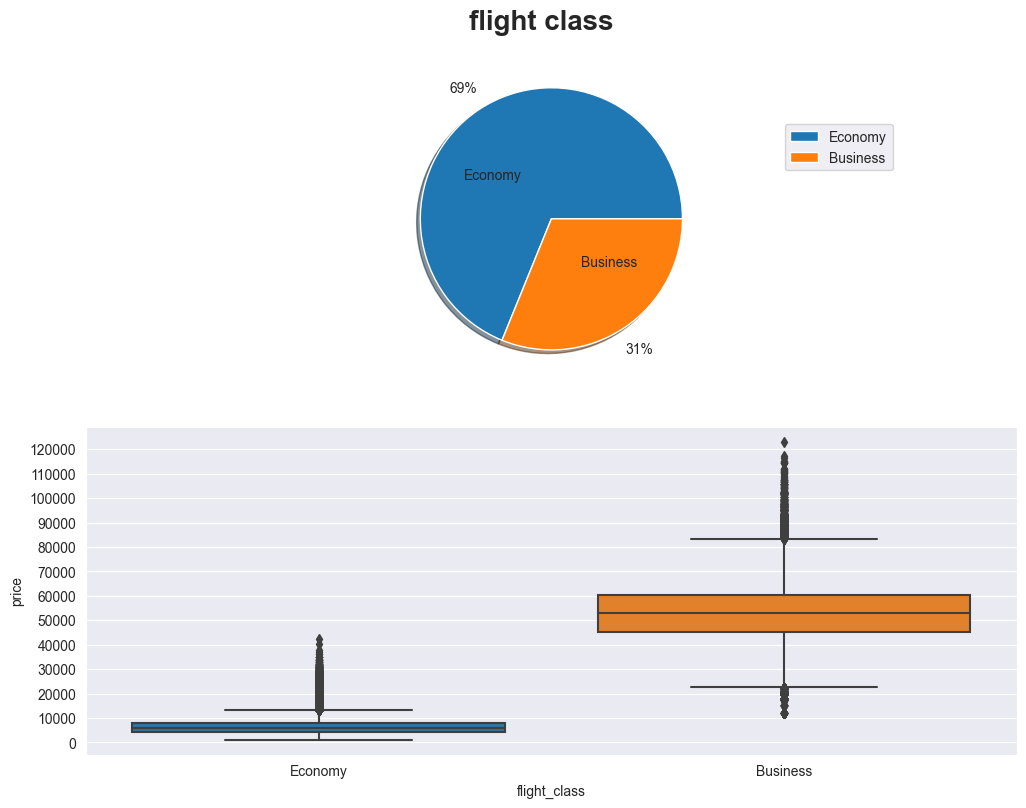

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='flight_class', y='price', data=df, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

##### Exploring duration of each flight

In [62]:
len(df.duration.value_counts())

476

- In Business class, from 1 to 5 hours, price growth sharply.
- In Business class for durations more than 5, Price in a channel between 45000 to 60000.
- In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in prices.
- With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes.

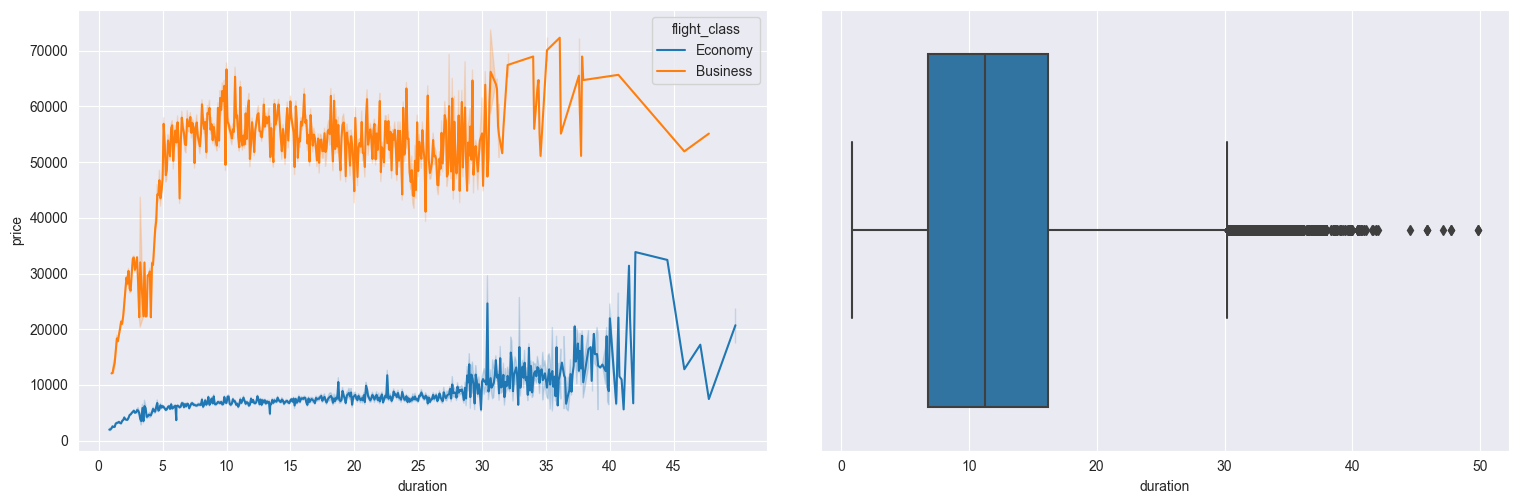

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))

# right AX
sns.boxplot(data=df, x='duration', ax=ax[1])
# set the style 
sns.set_style("ticks")

plt.show()

##### Exploring days left to flight departure

In [69]:
len(df.days_left.value_counts())

49

The earlier customer book ticket, the less client will pay (for values greater than 2).

As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines.

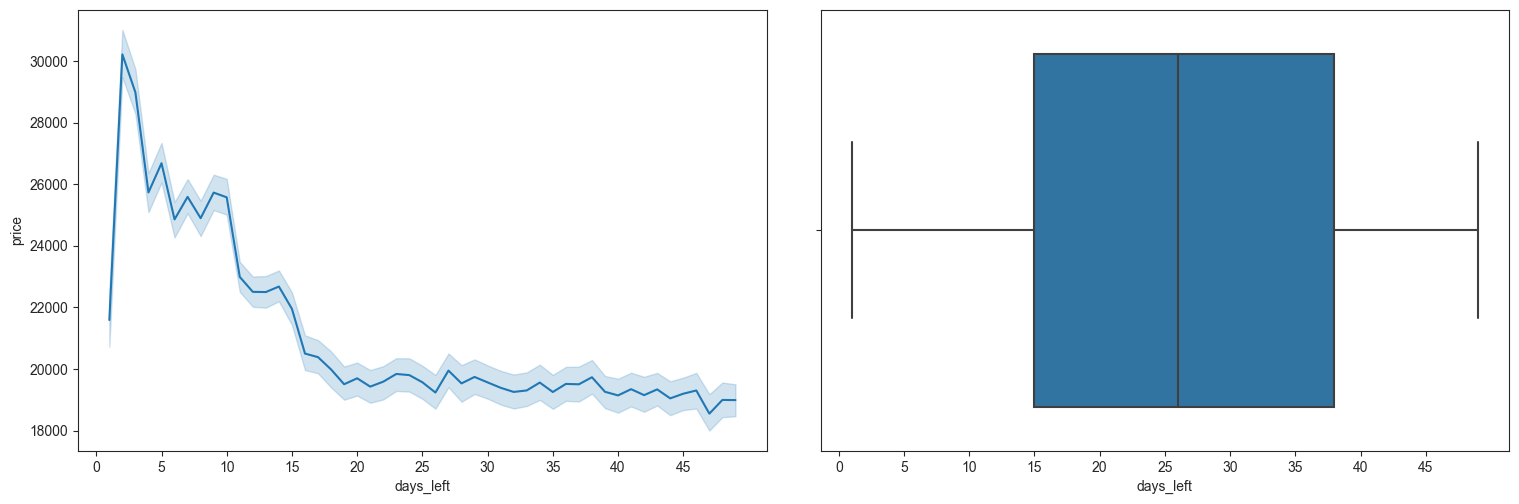

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# right AX
sns.boxplot(data=df, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

##### Exploring flight prices
Most of it lay between 500 and 41000 USA dollars.

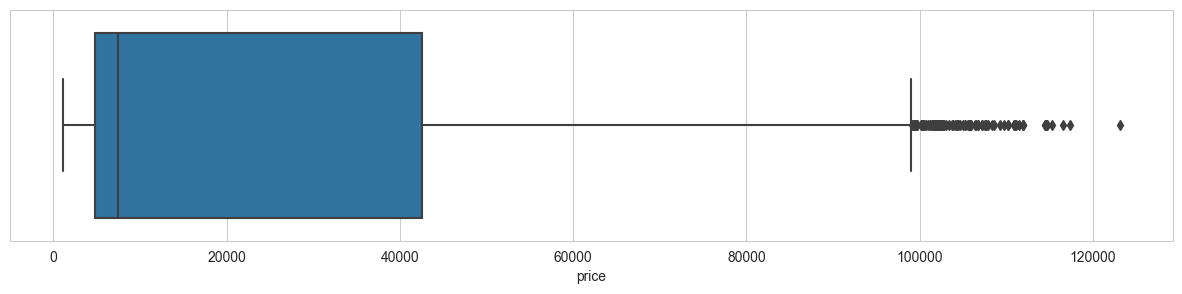

In [72]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='price')
plt.show()

##### Correlation plot without categorical variables

<Axes: >

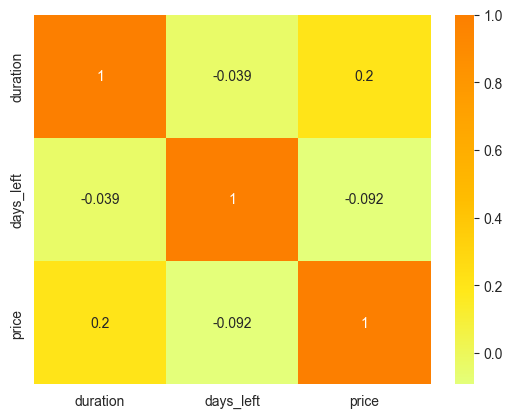

In [40]:
# features for matrix
col_for_corr = ['duration', 'days_left', 'price']

# correlation matrix calculation
corr = df[col_for_corr].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

## Feature engineering

Feature engineering is the process of selecting and transforming variables (features) to improve model performance in machine learning tasks. It involves creating new features, selecting relevant ones, and encoding categorical variables, among other techniques.

Importance of Feature Engineering:
- **Improved Model Performance**. Well-engineered features can lead to better model accuracy and generalization.
- **Better Interpretability**. Properly engineered features can make models more interpretable and understandable.
- **Reduced Overfitting**. Feature engineering can help in reducing overfitting by providing the model with more relevant information.

#### Techniques in Feature Engineering
1. **Imputation**. Handling missing values in the dataset using techniques like mean, median, or mode imputation.
2. **Feature Scaling**. Scaling features to a similar range, such as normalization or standardization, to prevent bias in models.
3. **Feature Encoding**. Converting categorical variables into numerical format, such as one-hot encoding or label encoding.
4. **Feature Transformation**. Transforming features using techniques like logarithm, square root, or Box-Cox transformation to make them more suitable for modeling.
5. **Feature Selection**. Selecting the most relevant features using techniques like correlation analysis, feature importance, or recursive feature elimination.
6. **Interaction Features**. Creating new features by combining existing ones, such as product or ratio features, to capture interaction effects.
7. **Dimensionality Reduction**. Reducing the number of features using techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) to simplify the model.


### Encoding Categorical Features with LabelEncoder()

Categorical variables are non-numeric variables that represent categories or groups. Label encoding is a technique used to convert categorical variables into numerical format, where each category is assigned a unique integer.

In [15]:
# sex feature
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

In [16]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'female': 0, 'male': 1}


In [167]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
# smoker or not feature
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

In [169]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'no': 0, 'yes': 1}


In [65]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed

In [18]:
# region feature
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [171]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [82]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


#### Save the new encoded dataset

In [173]:
df_encoded = df.copy()
df_encoded.to_csv('.//data//explore//insurance_encoded.csv', index=False)

In [11]:
dataset_encoded_path = "D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//data//explore//insurance_encoded.csv"

In [12]:
# is there such path?
print(os.path.exists(dataset_encoded_path))

True


In [13]:
df_encoded= pd.read_csv(dataset_encoded_path)

##### Correlation plot with encoded categorical variables

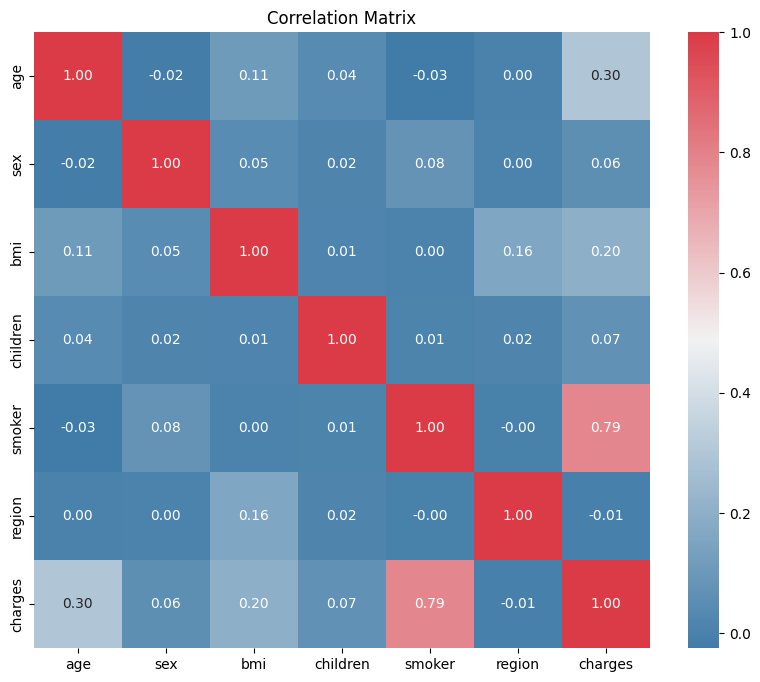

In [88]:
# create a subplot with specified figure size
f, ax = plt.subplots(figsize=(10, 8))

corr = df.corr()

# Create a heatmap of the correlation matrix
# Set the mask to hide the upper triangle of the heatmap
# Set the color map using seaborn's diverging_palette
# Add annotations to display correlation values in each cell
# Format annotations to two decimal places
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".2f")

ax.set_title('Correlation Matrix')
plt.show()

In [19]:
# corelation matrix in text output 
corr = df.corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


### Outlier Engineering
Outliers are data points that significantly differ from other observations in a dataset. Outlier engineering involves identifying and handling these outliers to prevent them from adversely affecting model performance.

#### Techniques for Outlier Engineering
1. **Identification**:
   - Statistical Methods: Use statistical techniques such as Z-score, interquartile range (IQR), or modified Z-score to identify outliers.
   - Visualization: Plotting techniques like box plots, scatter plots, or histograms can help visually identify outliers.
   - Domain Knowledge: Leverage domain knowledge to identify anomalies that may be outliers in the dataset.
2. **Handling Outliers**:
   - Removal. Exclude outliers from the dataset if they are deemed to be errors or anomalies.
   - Transformation. Apply transformations such as log transformation or Winsorization to mitigate the impact of outliers.
   - Imputation. Impute outliers with more representative values using techniques like mean, median, or nearest neighbors.
3. **Model-Specific Approaches**:
   - Robust Models. Use robust machine learning algorithms that are less sensitive to outliers, such as robust regression or tree-based models.
   - Weighted Models. Assign different weights to outliers or downsample them to reduce their influence on the model.
4. **Ensemble Methods**:
   - Ensemble techniques like bagging or boosting can help in reducing the impact of outliers by combining predictions from multiple models.

In [211]:
# function to create histogram, Q-Q plot and

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, color='lightgreen')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.gca().get_lines()[0].set_color('blue')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='darkorange')
    plt.title('Boxplot')

    plt.show()

In [118]:
# display unique values of each feature
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

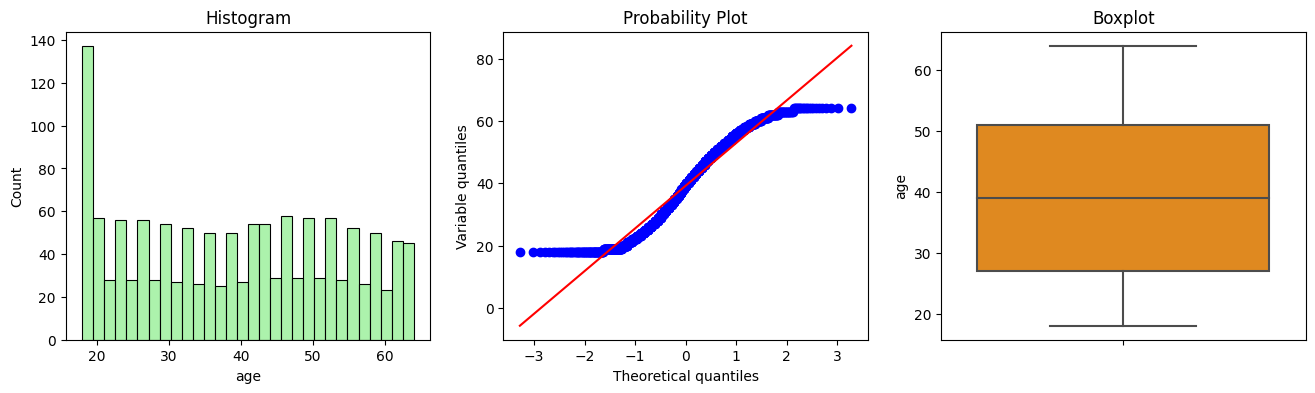

In [212]:
# let's find outliers in age
diagnostic_plots(df, 'age')

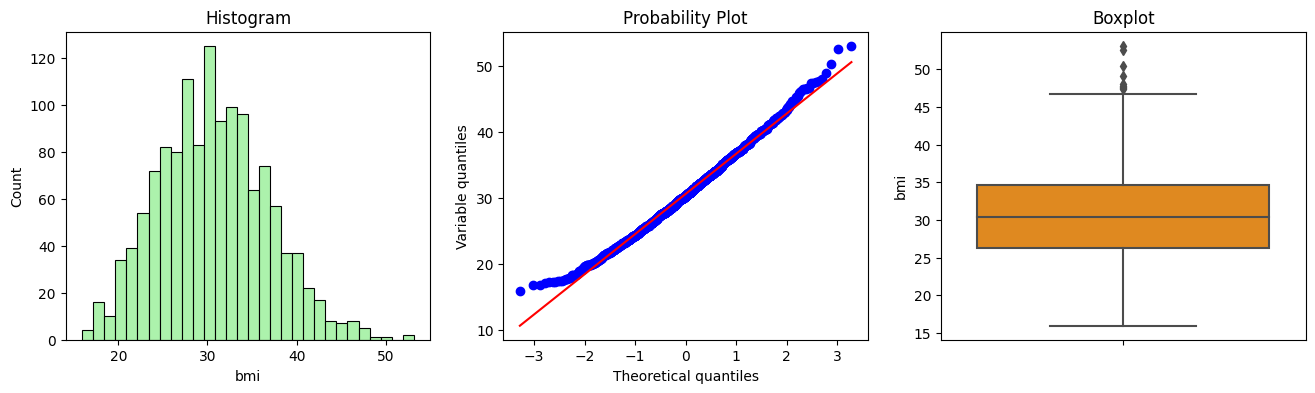

In [213]:
# let's find outliers in bmi
diagnostic_plots(df, 'bmi')

BMI (Body Mass Index) can definitely be greater than 50. BMI is a measure of body fat based on a person's weight and height, calculated by dividing weight in kilograms by height in meters squared. It's a useful tool for assessing whether someone is underweight, normal weight, overweight, or obese.

A BMI of 50 or above would indicate extreme obesity (Obese Class III). While less common, it's certainly possible for individuals to have BMIs in this range, especially in cases of severe obesity. However, it's important to note that BMI is just one indicator of health and doesn't account for factors like muscle mass, bone density, or distribution of fat, so it's not always a perfect measure of an individual's health status.

In [137]:
bmi_gt_50 = df[df['bmi'] > 50][['bmi', 'sex', 'charges', 'smoker']]
print(bmi_gt_50)

        bmi  sex     charges  smoker
847   50.38    1   2438.0552       0
1047  52.58    1  44501.3982       1
1317  53.13    1   1163.4627       0


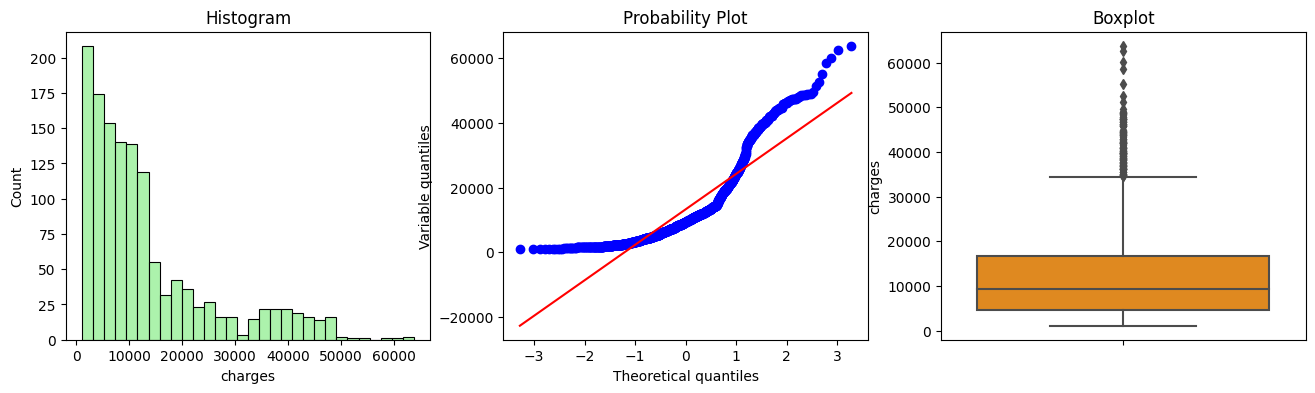

In [214]:
# let's find outliers in charges
diagnostic_plots(df, 'charges')

Charges are greater than 35000 for smokers.

In [151]:
charges_gt_50000 = df[(df['charges'] > 35000) & (df['smoker'] == 1)][['bmi', 'sex', 'charges', 'smoker']]
print(charges_gt_50000)

         bmi  sex      charges  smoker
14    42.130    1  39611.75770       1
19    35.300    1  36837.46700       1
23    31.920    0  37701.87680       1
29    36.300    1  38711.00000       1
30    35.600    1  35585.57600       1
...      ...  ...          ...     ...
1300  30.360    1  62592.87309       1
1301  30.875    1  46718.16325       1
1303  27.800    1  37829.72420       1
1313  34.700    0  36397.57600       1
1323  40.370    0  43896.37630       1

[130 rows x 4 columns]


In [152]:
charges_gt_50000 = df[(df['charges'] > 35000)][['bmi', 'sex', 'charges', 'smoker']]
print(charges_gt_50000)

         bmi  sex      charges  smoker
14    42.130    1  39611.75770       1
19    35.300    1  36837.46700       1
23    31.920    0  37701.87680       1
29    36.300    1  38711.00000       1
30    35.600    1  35585.57600       1
...      ...  ...          ...     ...
1300  30.360    1  62592.87309       1
1301  30.875    1  46718.16325       1
1303  27.800    1  37829.72420       1
1313  34.700    0  36397.57600       1
1323  40.370    0  43896.37630       1

[133 rows x 4 columns]


### Numeric Data Standardization

#### MinMaxScaler()
[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:
1. X<sub>std</sub> = (X - X<sub>min</sub>(axis=0)) / (X<sub>max</sub>(axis=0) - X<sub>min</sub>(axis=0))
2. X<sub>scaled</sub> = X<sub>std</sub> * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value. For an example visualization, refer to [Compare MinMaxScaler with other scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section).

In [53]:
# standardization: with the MinMaxScaler() from sklearn

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_encoded[['age', 'bmi', 'charges']])

# transform train and test sets
MinMaxScaled = scaler.transform(df_encoded[['age', 'bmi', 'charges']])

In [54]:
# the scaler stores the min of the features, learned from train set
scaler.data_min_

array([  18.    ,   15.96  , 1121.8739])

In [55]:
# the scaler stores the max of the features, learned from train set
scaler.data_max_

array([6.4000000e+01, 5.3130000e+01, 6.3770428e+04])

In [56]:
# access the range of each feature
scaler.data_range_

array([4.60000000e+01, 3.71700000e+01, 6.26485541e+04])

In [57]:
MinMaxScaled

array([[0.02173913, 0.3212268 , 0.25161076],
       [0.        , 0.47914985, 0.00963595],
       [0.2173913 , 0.45843422, 0.05311516],
       ...,
       [0.        , 0.56201238, 0.00810808],
       [0.06521739, 0.26472962, 0.01414352],
       [0.93478261, 0.35270379, 0.44724873]])

In [58]:
df_encoded_MinMaxScaler = df_encoded.copy()

In [59]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

MinMaxScaled = pd.DataFrame(MinMaxScaled, columns=['age', 'bmi', 'charges'])

In [61]:
# check contents of scaled columnss
MinMaxScaled.head(5)

,age,bmi,charges
0,0.021739,0.321227,0.251611
1,0.000000,0.479150,0.009636
2,0.217391,0.458434,0.053115
3,0.326087,0.181464,0.333010
4,0.304348,0.347592,0.043816


In [63]:
# replace the data in the df_encoded_MinMaxScaler variable using the data from the MinMaxScaled variable
df_encoded_MinMaxScaler['age'] = MinMaxScaled['age']
df_encoded_MinMaxScaler['bmi'] = MinMaxScaled['bmi']
df_encoded_MinMaxScaler['charges'] = MinMaxScaled['charges']

In [64]:
# check content of copy of dataset with scaled features
df_encoded_MinMaxScaler.head(5)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


In [65]:
df_encoded_MinMaxScaler.to_csv('.//data//explore//insurance_encoded_MinMaxScaler.csv', index=False)

In [66]:
ds_encoded_MinMaxScaler_path = "D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//data//explore//insurance_encoded_MinMaxScaler.csv"

In [67]:
# is there such path?
if os.path.exists(ds_encoded_MinMaxScaler_path):
    print("File exists at the specified path.")
else:
    print("File does not exist at the specified path.")

File exists at the specified path.


In [68]:
df_encoded_MinMaxScaler= pd.read_csv(ds_encoded_MinMaxScaler_path)

#### StandardScaler()
Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x<sub>mean</sub>) / std

The result of the above transformation is z, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, standardising a variable does not normalize the distribution of the data and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In [24]:
# standardization: with the StandardScaler() from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_encoded[['age', 'bmi', 'charges']])

# transform train and test sets
StandardScaled = scaler.transform(df_encoded[['age', 'bmi', 'charges']])

In [25]:
# the scaler stores the mean of the features, learned from train set
print("Mean of features:", scaler.mean_)

# the scaler stores the standard deviation deviation of the features,
# learned from train set
print("Standard deviation of features:", scaler.scale_)

Mean of features: [   39.20702541    30.66339686 13270.42226514]
Standard deviation of features: [1.40447090e+01 6.09590764e+00 1.21054850e+04]


In [26]:
StandardScaled

array([[-1.43876426, -0.45332   ,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.95368917],
       [-0.79795355,  0.38330685, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.96159623],
       [-1.29636188, -0.79781341, -0.93036151],
       [ 1.55168573, -0.26138796,  1.31105347]])

In [44]:
df_encoded_StandardScaler = df_encoded.copy()

In [62]:
df_encoded_StandardScaler.head(5)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


In [45]:
# let's transform the returned NumPy arrays to dataframes
# for the rest of the demo

StandardScaled = pd.DataFrame(StandardScaled, columns=['age', 'bmi', 'charges'])

In [46]:
# check contents of scaled columns
StandardScaled.head(5)

,age,bmi,charges
0,-1.438764,-0.453320,0.298584
1,-1.509965,0.509621,-0.953689
2,-0.797954,0.383307,-0.728675
3,-0.441948,-1.305531,0.719843
4,-0.513149,-0.292556,-0.776802


In [47]:
# replace the data in the df_encoded_StandardScaler variable using the data from the StandardScaled variable
df_encoded_StandardScaler['age'] = StandardScaled['age']
df_encoded_StandardScaler['bmi'] = StandardScaled['bmi']
df_encoded_StandardScaler['charges'] = StandardScaled['charges']

In [48]:
# check content of copy of dataset with scaled features
df_encoded_StandardScaler.head(5)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


In [49]:
df_encoded_StandardScaler.to_csv('.//data//explore//insurance_encoded_StandardScaler.csv', index=False)

In [50]:
ds_encoded_StandardScaler_path = "D://programming//information-technologies-of-smart-systems//calculation-and-graphic work//personal-medical-insurance-cost-prediction//data//explore//insurance_encoded_StandardScaler.csv"

In [51]:
# is there such path?
if os.path.exists(ds_encoded_StandardScaler_path):
    print("File exists at the specified path.")
else:
    print("File does not exist at the specified path.")

File exists at the specified path.


For **[Polynomial Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)**, feature scaling is often less critical compared to some other algorithms like SVMs or Neural Networks. However, it can still be beneficial in certain scenarios. Here's a brief overview of how feature scaling can affect Polynomial Regression:

**StandardScaler:**
- StandardScaler scales features to have a mean of 0 and a standard deviation of 1. This can be useful if the features have different scales or units and you want to center them around zero.
- Polynomial features can sometimes lead to multicollinearity, where features are highly correlated. Standardizing the features can mitigate multicollinearity to some extent.

**MinMaxScaler:**
+ MinMaxScaler scales features to a specified range, typically between 0 and 1. It preserves the relationships between the data points and can be useful if you want to bound the features within a specific range.
+ It can also help in cases where the polynomial features are bounded within a certain range and you want to maintain that range in the scaled data.

**No Scaling:**
* In some cases, particularly if the features are already on similar scales or if the polynomial features are generated in a way that preserves the original scale, you may choose not to scale the features at all.
* Additionally, if interpretability of the coefficients is important, you might prefer not to scale the features.

It's often a good idea to experiment with both scalers and evaluate their impact on the model's performance using cross-validation or other validation techniques.

## Modelling

### Regression
Regression in machine learning is a type of supervised learning task where the goal is to predict a continuous output variable based on one or more input features. In simpler terms, regression models try to find the relationship between independent variables (features) and dependent variables (target) and use this relationship to make predictions.

Key points about regression in machine learning:
1. **Continuous Output**: Unlike classification, where the output is a discrete label or category, regression predicts a continuous value. For example, predicting house prices, stock prices, temperature, or sales figures are all regression problems.
2. **Linear Regression**: One of the simplest and most commonly used regression techniques is linear regression, where the relationship between the input features and the target variable is modeled as a linear equation. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the actual and predicted values.
3. **Non-linear Regression**: In many real-world scenarios, the relationship between the input features and the target variable may not be linear. In such cases, more complex regression techniques like polynomial regression, decision tree regression, random forest regression, support vector regression, or neural network regression can be used to capture non-linear patterns.
4. **Evaluation Metrics**: Regression models are evaluated using metrics that quantify the difference between the actual and predicted values. Common evaluation metrics for regression include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (coefficient of determination), and others.
5. **Overfitting and Underfitting**: Like other machine learning models, regression models can suffer from overfitting (capturing noise in the training data) or underfitting (failing to capture the underlying patterns). Techniques such as regularization, cross-validation, and feature selection can help mitigate these issues.
6. **Feature Engineering**: Feature engineering plays a crucial role in regression tasks. It involves selecting, transforming, or creating new features from the raw data to improve the model's predictive performance. Techniques like scaling, normalization, encoding categorical variables, handling missing values, and creating interaction terms can be applied to preprocess the data before training the regression model.

Overall, regression is a fundamental technique in machine learning that finds numerous applications in various domains such as finance, healthcare, marketing, and engineering for making predictions and understanding relationships between variables.

### Baseline regression models with default hyperparameters

In [72]:
# get list of all features
df_encoded.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [117]:
# Split the DataFrame into features (X) and target (y)
X = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # features

y = df_encoded['charges'] # target

In [118]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# initialize regression models with specific random states
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr]

result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 1.078 sec
LinearRegression  ✓	 0.0 sec
Ridge  ✓	 0.172 sec
Lasso  ✓	 0.156 sec
KNeighborsRegressor  ✓	 0.328 sec


RandomForestRegressor  ✓	 0.688 sec
DecisionTreeRegressor  ✓	 0.016 sec
GradientBoostingRegressor  ✓	 0.109 sec
ExtraTreeRegressor  ✓	 0.016 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.898046,0.877973,3836.065033,4352.538932,2101.361701,2447.951558,0.898046,0.877973
RandomForestRegressor_baseline,0.974309,0.864261,1925.624128,4590.573539,1053.588715,2533.674644,0.974309,0.864261
XGBRegressor_baseline,0.994139,0.850168,919.765561,4822.991168,499.339156,2791.832518,0.994139,0.850168
LinearRegression_baseline,0.741705,0.783346,6105.789320,5799.587091,4208.762029,4186.508898,0.741705,0.783346
Lasso_baseline,0.741705,0.783320,6105.790345,5799.943043,4209.135074,4187.244900,0.741705,0.783320
Ridge_baseline,0.741684,0.783085,6106.033325,5803.084710,4218.431488,4198.141005,0.741684,0.783085
DecisionTreeRegressor_baseline,0.998308,0.684357,494.205984,7000.231682,29.572515,3154.705669,0.998308,0.684357
ExtraTreeRegressor_baseline,0.998308,0.671399,494.205984,7142.470320,29.572515,3310.218896,0.998308,0.671399
KNeighborsRegressor_baseline,0.393768,0.144504,9354.125544,11524.523708,6491.688549,7953.210498,0.393768,0.144504


#### Feature importance

In [ ]:
rankings = ml_model.feature_importances_.tolist()

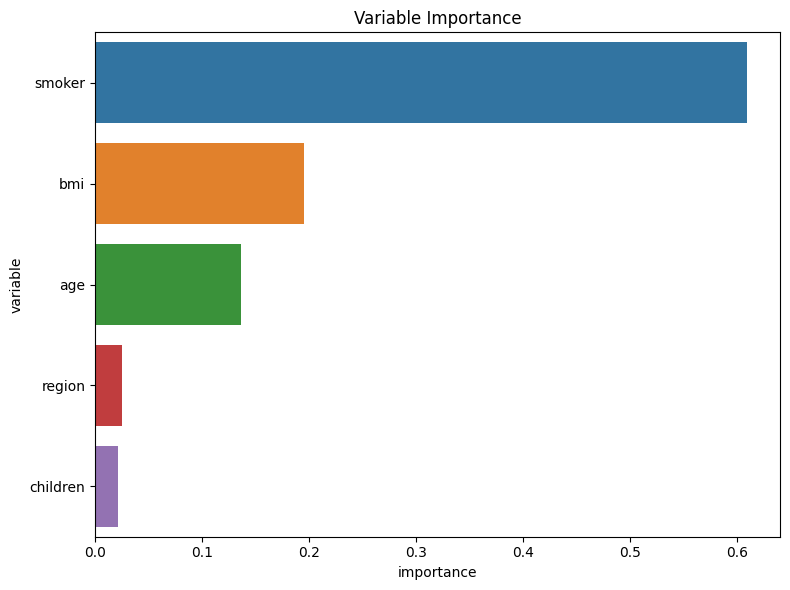

In [120]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()

### Baseline regression models *with PolynomialFeatures* matrix of 2

In [141]:
# Split the DataFrame into features (X) and target (y)
X = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # features

y = df_encoded['charges'] # target

In [142]:
# creating an instance of PolynomialFeatures with degree 2
quad = PolynomialFeatures (degree = 2)
# transforming the input features X into quadratic polynomial features
# this generates new features that are combinations of the original features up to degree 2
x_quad = quad.fit_transform(X)

In [143]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_quad, y, test_size=0.2, random_state=42)

In [144]:
# initialize regression models with specific random states
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr]

result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 1.312 sec
LinearRegression  ✓	 0.0 sec
Ridge  ✓	 0.156 sec
Lasso  ✓	 0.172 sec
KNeighborsRegressor  ✓	 0.406 sec


RandomForestRegressor  ✓	 1.422 sec
DecisionTreeRegressor  ✓	 0.016 sec
GradientBoostingRegressor  ✓	 0.312 sec
ExtraTreeRegressor  ✓	 0.016 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.913613,0.882020,3531.079729,4279.741000,1957.139704,2409.996822,0.913613,0.882020
RandomForestRegressor_baseline,0.974581,0.869866,1915.426618,4494.788638,1053.655276,2413.199889,0.974581,0.869866
Ridge_baseline,0.840397,0.868124,4799.589844,4524.765957,2921.514403,2732.520621,0.840397,0.868124
Lasso_baseline,0.840507,0.867811,4797.941643,4530.143241,2925.518663,2726.472040,0.840507,0.867811
LinearRegression_baseline,0.837402,0.864922,4844.420432,4579.378770,3035.118503,2876.026334,0.837402,0.864922
XGBRegressor_baseline,0.996256,0.852146,735.134486,4791.052846,347.089509,2635.593164,0.996256,0.852146
DecisionTreeRegressor_baseline,0.998308,0.801469,494.205984,5551.726579,29.572515,2308.392866,0.998308,0.801469
ExtraTreeRegressor_baseline,0.998308,0.744335,494.205984,6300.129213,29.572515,2829.846888,0.998308,0.744335
KNeighborsRegressor_baseline,0.346751,0.119860,9710.090728,11689.335127,6799.720735,8219.705903,0.346751,0.119860


### Baseline regression models with *MinMaxScaler* data without PolynomialFeatures

In [90]:
# Split the DataFrame into features (X) and target (y)
X = df_encoded_MinMaxScaler[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # features

y = df_encoded_MinMaxScaler['charges'] # target

In [91]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# initialize regression models with specific random states
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)
#rnr = RadiusNeighborsRegressor(random_state = 42)
# svr = SVR(random_state = 42)
gpr = GaussianProcessRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr, gpr]

result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 0.875 sec
LinearRegression  ✓	 0.172 sec
Ridge  ✓	 0.141 sec
Lasso  ✓	 0.172 sec
KNeighborsRegressor  ✓	 0.516 sec
RandomForestRegressor  ✓	 0.516 sec
DecisionTreeRegressor  ✓	 0.016 sec
GradientBoostingRegressor  ✓	 0.109 sec
ExtraTreeRegressor  ✓	 0.016 sec
GaussianProcessRegressor  ✓	 1.016 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.898046,0.877973,0.061232,0.069475,0.033542,0.039074,0.898046,0.877973
RandomForestRegressor_baseline,0.974440,0.863972,0.030658,0.073353,0.016765,0.040546,0.974440,0.863972
XGBRegressor_baseline,0.993995,0.852686,0.014861,0.076335,0.007866,0.043728,0.993995,0.852686
LinearRegression_baseline,0.741705,0.783346,0.097461,0.092573,0.067181,0.066825,0.741705,0.783346
Ridge_baseline,0.741643,0.783118,0.097473,0.092622,0.067076,0.066686,0.741643,0.783118
ExtraTreeRegressor_baseline,0.998308,0.771167,0.007889,0.095140,0.000472,0.042052,0.998308,0.771167
KNeighborsRegressor_baseline,0.803382,0.735285,0.085032,0.102328,0.051107,0.063950,0.803382,0.735285
DecisionTreeRegressor_baseline,0.998308,0.727382,0.007889,0.103844,0.000472,0.048087,0.998308,0.727382
Lasso_baseline,0.000000,-0.000919,0.191766,0.198977,0.143667,0.153129,0.000000,-0.000919


### Baseline regression models with *StandardScaler* data without PolynomialFeatures

In [133]:
# Split the DataFrame into features (X) and target (y)
X = df_encoded_StandardScaler[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # features

y = df_encoded_StandardScaler['charges'] # target

In [ ]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# initialize regression models with specific random states
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)
#rnr = RadiusNeighborsRegressor(random_state = 42)
# svr = SVR(random_state = 42)
gpr = GaussianProcessRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr, gpr]

result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 1.078 sec
LinearRegression  ✓	 0.0 sec
Ridge  ✓	 0.172 sec
Lasso  ✓	 0.172 sec
KNeighborsRegressor  ✓	 0.438 sec


RandomForestRegressor  ✓	 0.516 sec
DecisionTreeRegressor  ✓	 0.031 sec
GradientBoostingRegressor  ✓	 0.156 sec
ExtraTreeRegressor  ✓	 0.016 sec
GaussianProcessRegressor  ✓	 0.922 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.898046,0.877550,0.316887,0.360173,0.173588,0.202335,0.898046,0.877550
RandomForestRegressor_baseline,0.974276,0.865119,0.159173,0.378014,0.087103,0.208042,0.974276,0.865119
XGBRegressor_baseline,0.994077,0.850465,0.076379,0.398018,0.041398,0.230354,0.994077,0.850465
LinearRegression_baseline,0.741705,0.783346,0.504382,0.479088,0.347674,0.345836,0.741705,0.783346
Ridge_baseline,0.741684,0.783085,0.504402,0.479376,0.348439,0.346760,0.741684,0.783085
KNeighborsRegressor_baseline,0.795118,0.710149,0.449214,0.554139,0.269205,0.322244,0.795118,0.710149
DecisionTreeRegressor_baseline,0.998308,0.709617,0.040825,0.554648,0.002443,0.246004,0.998308,0.709617
ExtraTreeRegressor_baseline,0.998308,0.669776,0.040825,0.591474,0.002443,0.274660,0.998308,0.669776
Lasso_baseline,0.000000,-0.000919,0.992434,1.029749,0.743511,0.792479,0.000000,-0.000919


### Baseline regression models without *'children'* feature and with PolynomialFeatures

In [154]:
# deleting feature 'children'
X = df_encoded.drop(['charges','children'], axis = 1)
Y = df_encoded.charges  # target

# creating an instance of PolynomialFeatures with degree 2
quad = PolynomialFeatures (degree = 2)
# transforming the input features X into quadratic polynomial features
# this generates new features that are combinations of the original features up to degree 2
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, test_size=0.2, random_state=42)

lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr]

result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

RandomForestRegressor  ✓	 0.781 sec
GradientBoostingRegressor  ✓	 0.281 sec
LinearRegression  ✓	 0.0 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.906376,0.873384,3676.018847,4433.625698,2083.829667,2519.561704,0.906376,0.873384
LinearRegression_baseline,0.835682,0.862207,4869.972761,4625.173407,2983.118678,2823.290299,0.835682,0.862207
RandomForestRegressor_baseline,0.973032,0.856412,1972.897358,4721.430221,1108.386813,2657.723463,0.973032,0.856412


### Baseline regression models without *'region*' feature and with PolynomialFeatures

In [169]:
# deleting feature 'region'
X = df_encoded.drop(['charges','region'], axis = 1)
Y = df_encoded.charges

# creating an instance of PolynomialFeatures with degree 2
quad = PolynomialFeatures (degree = 2)
# transforming the input features X into quadratic polynomial features
# this generates new features that are combinations of the original features up to degree 2
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, test_size=0.2, random_state=42)

lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)
gbr =  GradientBoostingRegressor(random_state = 42)
etr = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo = [xgbt, lm, ridge, lasso, knn, rf, dtree, gbr, etr]

# list for results of previous best models
result = []

for i in algo:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train,y_train)
        
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test)),
                  r2_score(y_train, ml_model.predict(X_train)),
                  r2_score(y_test, ml_model.predict(X_test))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor  ✓	 1.016 sec
LinearRegression  ✓	 0.0 sec
Ridge  ✓	 0.125 sec
Lasso  ✓	 0.172 sec
KNeighborsRegressor  ✓	 0.391 sec
RandomForestRegressor  ✓	 1.188 sec
DecisionTreeRegressor  ✓	 0.016 sec
GradientBoostingRegressor  ✓	 0.25 sec
ExtraTreeRegressor  ✓	 0.016 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
GradientBoostingRegressor_baseline,0.909564,0.884762,3612.890453,4229.719923,1994.232121,2402.180667,0.909564,0.884762
Ridge_baseline,0.837345,0.867382,4845.256885,4537.480504,2941.739688,2781.345595,0.837345,0.867382
Lasso_baseline,0.837453,0.866962,4843.651407,4544.673041,2945.426050,2779.964683,0.837453,0.866962
LinearRegression_baseline,0.837456,0.866944,4843.610528,4544.969862,2946.198677,2783.356805,0.837456,0.866944
RandomForestRegressor_baseline,0.972708,0.860197,1984.746067,4658.787101,1082.612897,2455.683798,0.972708,0.860197
XGBRegressor_baseline,0.995600,0.840341,796.868123,4978.639363,395.158384,2720.287917,0.995600,0.840341
DecisionTreeRegressor_baseline,0.998308,0.755805,494.205984,6157.183038,29.572515,2694.995542,0.998308,0.755805
ExtraTreeRegressor_baseline,0.998308,0.729844,494.205984,6476.221024,29.572515,3028.218157,0.998308,0.729844
KNeighborsRegressor_baseline,0.393287,0.157401,9357.834084,11437.329081,6543.612219,8062.165955,0.393287,0.157401


### Final model choice

In [23]:
X = df_encoded.drop(['charges','region'], axis = 1)
Y = df_encoded.charges

# quad = PolynomialFeatures (degree = 2)
# x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

plr = GradientBoostingRegressor(random_state = 42).fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

# Calculating metrics
score_train = plr.score(X_train, Y_train)
score_test = plr.score(X_test, Y_test)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Function to format score_train in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# Displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train), mse_train, mae_train, r2_train],
    'Test Data': [format_score(score_test), mse_test, mae_test, r2_test]
})

print(metrics_df)

  Metric       Train Data        Test Data
0  Score         0.895655         0.897123
1    MSE  14959484.462928  16370815.053277
2    MAE      2123.736738       2366.20557
3     R2         0.895655         0.897123


#### Scatter plot of predicted values versus residuals (the difference between predicted and actual values) for both the training and test data sets

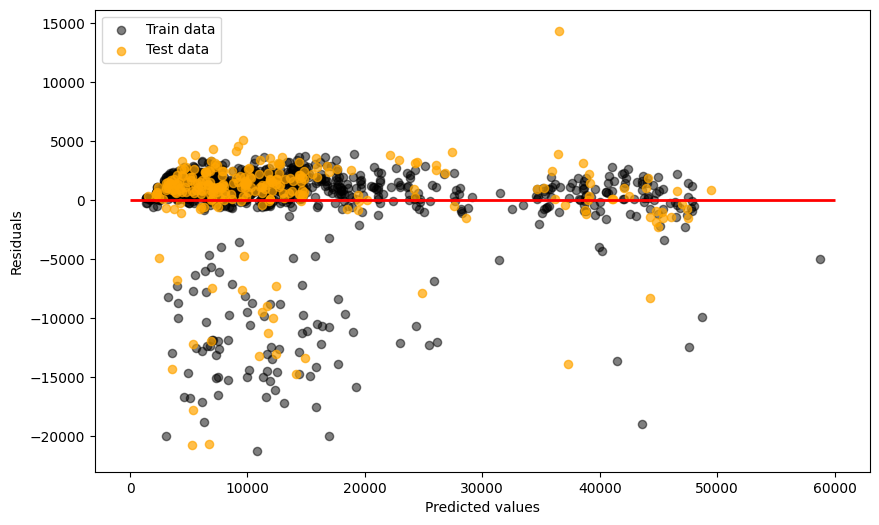

In [19]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the residuals for the training data
plt.scatter(Y_train_pred, Y_train_pred - Y_train,
            c='black', marker='o', s=35, alpha=0.5,
            label='Train data')

# Plot the residuals for the test data
plt.scatter(Y_test_pred, Y_test_pred - Y_test,
            c='orange', marker='o', s=35, alpha=0.7,
            label='Test data')

# Label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Add a legend
plt.legend(loc='upper left')

# Add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')

# Show the plot
plt.show()

##### Feature importance for Gradient Boosting Regressor

In [ ]:
rankings = plr.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable", "importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()

### Cross-validation technics

#### K-fold validation
When evaluating different settings (“hyperparameters”) for estimators, such as the CV setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

In [187]:
# Define feature matrix X and target variable Y
X = df_encoded.drop(['charges', 'region'], axis=1)
Y = df_encoded['charges']

# Transform features using polynomial features if necessary
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_quad, Y, test_size=0.2, random_state=0)

# Initialize the model
model = GradientBoostingRegressor(random_state=42)
# RandomForestRegressor(random_state = 42)
# LinearRegression()
# Ridge(random_state = 42)
# GradientBoostingRegressor(random_state=42)
# Lasso(random_state = 42)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores, test_scores, train_mse, test_mse, train_mae, test_mae, train_r2, test_r2 = [], [], [], [], [], [], [], []

for train_index, test_index in kf.split(X_quad):
    X_train, X_test = X_quad[train_index], X_quad[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    model.fit(X_train, Y_train)
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    train_scores.append(model.score(X_train, Y_train))
    test_scores.append(model.score(X_test, Y_test))
    
    train_mse.append(mean_squared_error(Y_train, Y_train_pred))
    test_mse.append(mean_squared_error(Y_test, Y_test_pred))
    
    train_mae.append(mean_absolute_error(Y_train, Y_train_pred))
    test_mae.append(mean_absolute_error(Y_test, Y_test_pred))
    
    train_r2.append(r2_score(Y_train, Y_train_pred))
    test_r2.append(r2_score(Y_test, Y_test_pred))

# Calculate average performance metrics across all folds
avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

avg_train_mse = np.mean(train_mse)
avg_test_mse = np.mean(test_mse)

avg_train_mae = np.mean(train_mae)
avg_test_mae = np.mean(test_mae)

avg_train_r2 = np.mean(train_r2)
avg_test_r2 = np.mean(test_r2)

# Print the results
print('Average Score train data: %.5f, Average Score test data: %.5f' % (avg_train_score, avg_test_score))
print('Average MSE train data: %.5f, Average MSE test data: %.5f' % (avg_train_mse, avg_test_mse))
print('Average MAE train data: %.5f, Average MAE test data: %.5f' % (avg_train_mae, avg_test_mae))
print('Average R2 train data: %.5f, Average R2 test data: %.5f' % (avg_train_r2, avg_test_r2))


Average Score train data: 0.91739, Average Score test data: 0.85188
Average MSE train data: 12083975.90761, Average MSE test data: 21101318.40206
Average MAE train data: 1891.18876, Average MAE test data: 2524.18689
Average R2 train data: 0.91739, Average R2 test data: 0.85188


#### Random permutations cross-validation
The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

In [194]:
# Define your DataFrame and preprocessing steps
X = df_encoded.drop(['charges','region'], axis=1)
y = df_encoded['charges']

# Initialize ShuffleSplit with desired parameters
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics
train_scores, test_scores, train_mse, test_mse, train_mae, test_mae, train_r2, test_r2 = [], [], [], [], [], [], [], []

# Iterate through ShuffleSplit splits
for train_index, test_index in shuffle_split.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit model
    plr = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = plr.predict(X_train)
    y_test_pred = plr.predict(X_test)
    
    # Calculate evaluation metrics
    train_score = plr.score(X_train, y_train)
    test_score = plr.score(X_test, y_test)
    train_mse_score = mean_squared_error(y_train, y_train_pred)
    test_mse_score = mean_squared_error(y_test, y_test_pred)
    train_mae_score = mean_absolute_error(y_train, y_train_pred)
    test_mae_score = mean_absolute_error(y_test, y_test_pred)
    train_r2_score = r2_score(y_train, y_train_pred)
    test_r2_score = r2_score(y_test, y_test_pred)
    
    # Append metrics to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    train_mse.append(train_mse_score)
    test_mse.append(test_mse_score)
    train_mae.append(train_mae_score)
    test_mae.append(test_mae_score)
    train_r2.append(train_r2_score)
    test_r2.append(test_r2_score)

# Calculate mean and standard deviation of evaluation metrics
mean_train_score = np.mean(train_scores)
mean_test_score = np.mean(test_scores)
mean_train_mse = np.mean(train_mse)
mean_test_mse = np.mean(test_mse)
mean_train_mae = np.mean(train_mae)
mean_test_mae = np.mean(test_mae)
mean_train_r2 = np.mean(train_r2)
mean_test_r2 = np.mean(test_r2)

std_train_score = np.std(train_scores)
std_test_score = np.std(test_scores)
std_train_mse = np.std(train_mse)
std_test_mse = np.std(test_mse)
std_train_mae = np.std(train_mae)
std_test_mae = np.std(test_mae)
std_train_r2 = np.std(train_r2)
std_test_r2 = np.std(test_r2)

# Print the mean and standard deviation of evaluation metrics
print("Mean train score: {:.5f} +/- {:.5f}".format(mean_train_score, std_train_score))
print("Mean test score: {:.5f} +/- {:.5f}".format(mean_test_score, std_test_score))
print("Mean train MSE: {:.5f} +/- {:.5f}".format(mean_train_mse, std_train_mse))
print("Mean test MSE: {:.5f} +/- {:.5f}".format(mean_test_mse, std_test_mse))
print("Mean train MAE: {:.5f} +/- {:.5f}".format(mean_train_mae, std_train_mae))
print("Mean test MAE: {:.5f} +/- {:.5f}".format(mean_test_mae, std_test_mae))
print("Mean train R^2: {:.5f} +/- {:.5f}".format(mean_train_r2, std_train_r2))
print("Mean test R^2: {:.5f} +/- {:.5f}".format(mean_test_r2, std_test_r2))


Mean train score: 0.90242 +/- 0.01112
Mean test score: 0.85730 +/- 0.04462
Mean train MSE: 14224739.00574 +/- 1271403.97849
Mean test MSE: 20427228.90336 +/- 5363680.73304
Mean train MAE: 2042.63645 +/- 142.04313
Mean test MAE: 2452.22782 +/- 238.02025
Mean train R^2: 0.90242 +/- 0.01112
Mean test R^2: 0.85730 +/- 0.04462


## Model tuning

https://en.wikipedia.org/wiki/Hyperparameter_optimization 

### Parameters vs Hyperparameters
Let’s now define what are hyperparameters, but before doing that let’s consider the difference between a parameter and a hyperparameter.

A parameter can be considered to be intrinsic or internal to the model and can be obtained after the model has learned from the data. 
Examples of parameters are regression coefficients in linear regression, support vectors in support vector machines and weights in neural networks.

A hyperparameter can be considered to be extrinsic or external to the model and can be set arbitrarily by the practitioner. 
Examples of hyperparameters include the k in k-nearest neighbors, number of trees and maximum number of features in random forest, learning rate and momentum in neural networks, the C and gamma parameters in support vector machines.

### Hyperparameter tuning
As there are no universal best hyperparameters to use for any given problem, hyperparameters are typically set to default values. However, the optimal set of hyperparameters can be obtained from manual empirical (trial-and-error) hyperparameter search or in an automated fashion via the use of optimization algorithm to maximize the fitness function.

Two common hyperparameter tuning methods include grid search and random search. As the name implies, a grid search entails the creation of a grid of possible hyperparameter values whereby models are iteratively built for all of these hyperparameter combinations in a brute force manner. In a random search, not all hyperparameter combinations are used, but instead each iteration makes use of a random hyperparameter combination.

#### Building a Baseline Gradient Boosting Regressor
Here, we will first start by building a baseline Gradient Boosting Regressor that will serve as a baseline for comparative purpose with the model using the optimal set of hyperparameters.
For the baseline model, we will set a default hyperparameters of Gradient Boosting Regressor.

In [24]:
X = df_encoded.drop(['charges','region'], axis = 1)
Y = df_encoded.charges

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

plr = GradientBoostingRegressor(random_state = 42).fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

# calculating metrics
score_train = plr.score(X_train, Y_train)
score_test = plr.score(X_test, Y_test)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# function to format score_train in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train), mse_train, mae_train, r2_train],
    'Test Data': [format_score(score_test), mse_test, mae_test, r2_test]
})

print(metrics_df)

  Metric       Train Data        Test Data
0  Score         0.895655         0.897123
1    MSE  14959484.462928  16370815.053277
2    MAE      2123.736738       2366.20557
3     R2         0.895655         0.897123


In [25]:
# display baseline model params
plr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning
Now we will be performing the tuning of hyperparameters of the random forest model. 



In [37]:
# grid with all param to tune on model
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [2, 3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_samples_split': [2, 5, 10, 13],
    'min_samples_leaf': [1, 2, 4, 5]
}

In [38]:
# create new GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', # Використовуємо середньоквадратичну помилку для оцінки
                           cv=5, # Кількість складових для крос-валідації
                           n_jobs=-1) # Використовуємо всі доступні ядра CPU

In [39]:
# release Grid Search
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 13],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [53]:
# display best tuned hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 50}


In [50]:
# define features for model
X = df_encoded.drop(['charges','region', 'sex'], axis = 1)
Y = df_encoded.charges

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

plr = GradientBoostingRegressor(random_state = 42, learning_rate = 0.1, max_depth = 3, min_samples_leaf = 4, min_samples_split = 13, n_estimators = 50).fit(X_train,Y_train)

# train model
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

# calculating metrics
score_train = plr.score(X_train, Y_train)
score_test = plr.score(X_test, Y_test)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# function to format score_train in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train), mse_train, mae_train, r2_train],
    'Test Data': [format_score(score_test), mse_test, mae_test, r2_test]
})

print(metrics_df)

  Metric       Train Data        Test Data
0  Score         0.873020         0.899796
1    MSE  18204620.074767  15945425.744968
2    MAE      2353.121722        2375.0363
3     R2          0.87302         0.899796


#### **Result Analysis**
З високим значенням коефіцієнта детермінації (R2) як на навчальній, так і на тестовій вибірці (0.87 для навчання та 0.90 для тестування), можна зробити висновок, що модель достатньо добре пояснює варіацію в медичних витратах застрахованих осіб на основі використаних ознак.

Також слід звернути увагу на інші метрики:
1. Середньоквадратична помилка (MSE) для тестової вибірки дорівнює приблизно 15,955,774. Це означає, що середньоквадратичне відхилення моделі від реальних даних є приблизно на рівні $15,955 в квадратних одиницях витрат на медичне обслуговування.
2. Середня абсолютна помилка (MAE) для тестової вибірки становить приблизно 2,374. Це означає, що середня абсолютна різниця між прогнозованими та реальними вартостями медичного страхування становить приблизно $2,374.

Загалом, отримані метрики свідчать про те, що модель *Gradient Boosting Regressor* є ефективною у прогнозуванні медичних витрат застрахованих осіб на основі введених характеристик, з високою точністю та достатньою стабільністю як на навчальній, так і на тестовій вибірці.

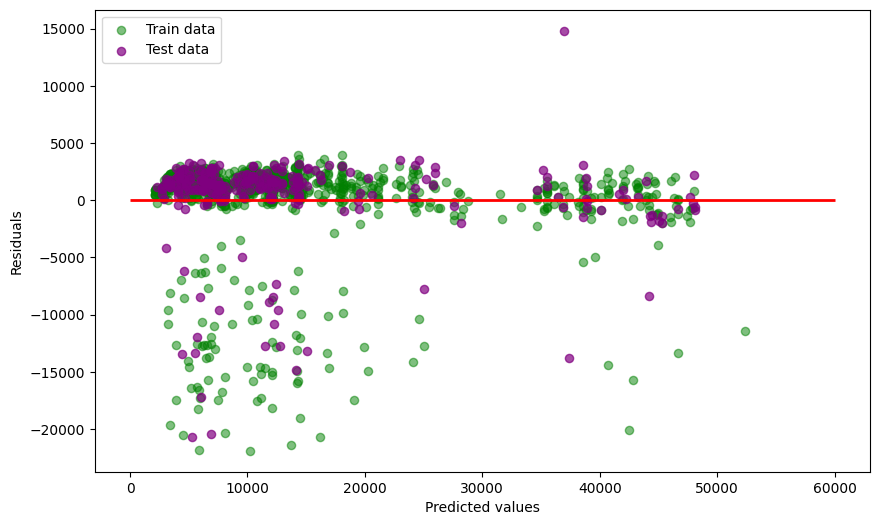

In [51]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the residuals for the training data
plt.scatter(Y_train_pred, Y_train_pred - Y_train,
            c='green', marker='o', s=35, alpha=0.5,
            label='Train data')

# Plot the residuals for the test data
plt.scatter(Y_test_pred, Y_test_pred - Y_test,
            c='purple', marker='o', s=35, alpha=0.7,
            label='Test data')

# Label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Add a legend
plt.legend(loc='upper left')

# Add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')

# Show the plot
plt.show()

##### Feature importance for **Final** Gradient Boosting Regressor

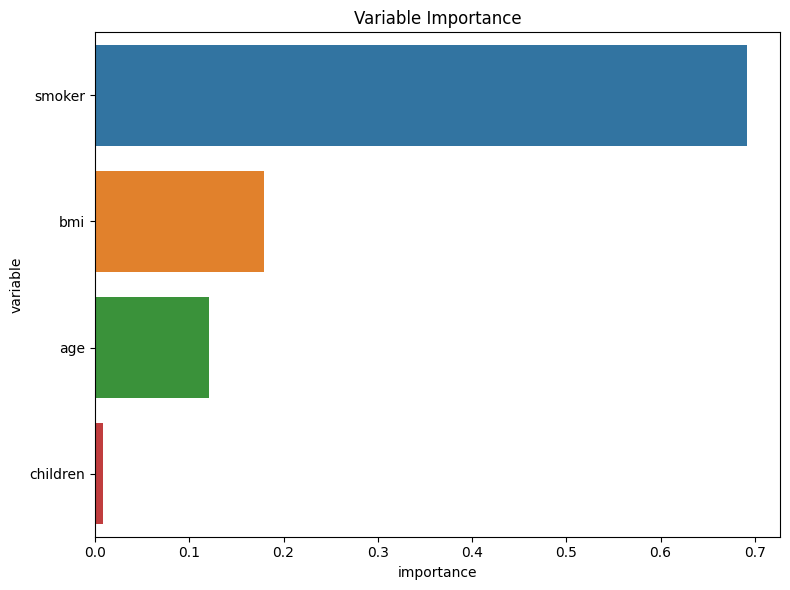

In [52]:
rankings = plr.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()